# MRI Modalities

MRI is versatile. Tuning the MRI scanner in different ways allows us to generate images that are sensitive to varying underlying biological properties. This is done by creating contrast between tissue types.

## Image Contrast

MRI scans are acquired using a combination of magnetic fields and radiofrequency pulses. While inside the magnetic field in the scanner, radiofrequency pulses transmit energy to tissues within the brain. These tissues then emit energy differently depending on unique tissue properties and produce different signal intensities. These varying signal intensities in the MR image create a contrast. This contrast allows us to distinguish between different tissue types. 

See this short [video](https://www.youtube.com/watch?v=1CGzk-nV06g) for a visual explanation.

Various contrasts can be created by tuning the MRI scanner in different ways using **MRI sequences**. Different MRI sequences provide unique information regarding the underlying biological properties. We often call these **MRI modalities**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import nilearn
from nilearn import datasets
from nilearn import plotting
import pandas as pd
import matplotlib as mpl
import seaborn as sns

## T1-weighted and T2-weighted MRI

The time taken for energy to be emitted is called **relaxation time**. This can be broadly broken down into two types:

### T1 relaxation
The longitudinal relaxation time (T1) is the time taken for protons in the tissue to emit energy while realigning with the main magnetic field.  

### T2 relaxation
The transverse relaxation time (T2) is the time taken for protons in the tissue to emit energy while losing coherence (i.e. moving out of time with each other).


### Tissue Relaxation Properties Create Image Contrast

MRI sequences can be *weighted* towards T1 or T2 relaxation properties to produce unique image contrasts. We often abbreviate this to T1w or T2w images.

The graphs below show how brain tissues have different relaxation properties. 

Tissues with faster relaxation properties have higher signal in T1w and T2w images. Tissues with slower relaxation properties have lower signal in T1w and T2w images. 

Higher signal relates to brighter voxels in an image. 

<img src="../fig/relaxations.png" alt="Drawing" align="middle" width="1000px"/>

Can you tell which tissue type would be brightest and darkest on a T1-weighted and T2-weighted image?

This is a complex topic that we cannot cover in detail here. If you would like more detail, this [review article](https://pmj.bmj.com/content/89/1050/209) is a good place to start.

### Visualising T1w and T2w Images

With our new understanding of image contrasts, lets visualise this!

Lets use a dataset we have already downloaded:

- [Craving dataset](https://openneuro.org/datasets/ds003242/versions/1.0.0): Cue Induced Craving task following food fasting, social isolation and baseline

In [15]:
# first state the directory we have downloaded the data in
local_data_dir = '../data/'

# create filename variables - this helps make the commands in the next cell easier to read
T1_filename = local_data_dir + 'modalities_examples/craving_sub-SAXSISO01b_T1w.nii.gz'
T2_filename = local_data_dir + 'modalities_examples/craving_sub-SAXSISO01b_T2w.nii.gz'      


### Read T1w and T2w anatomical images

In [16]:
# lets load the images using nibabel (see previous episode)
T1_img = nib.load(T1_filename)
T2_img = nib.load(T2_filename)

# grab data array
T1_data = T1_img.get_fdata()
T2_data = T2_img.get_fdata()

# print basic information of images
print('T1 image path: {},\n\timage shape: {}'.format(T1_filename, T1_img.shape))
print('\tintensity value range: min: {:3.2f}, max: {:3.2f}'.format(np.min(T1_data.ravel()),np.max(T1_data.ravel())))
print('\nT2 image path: {},\n\timage shape: {}'.format(T2_filename, T2_img.shape))
print('\tintensity value range: min: {:3.2f}, max: {:3.2f}'.format(np.min(T2_data.ravel()),np.max(T2_data.ravel())))


T1 image path: ../data/modalities_examples/craving_sub-SAXSISO01b_T1w.nii.gz,
	image shape: (176, 256, 256)
	intensity value range: min: 0.00, max: 526.00

T2 image path: ../data/modalities_examples/craving_sub-SAXSISO01b_T2w.nii.gz,
	image shape: (176, 256, 256)
	intensity value range: min: 0.00, max: 326.00


### Visualize T1w and T2w Images

Nilearn is a useful package for visualising MRI data using python.

The cell below plots a single slice from three views: Coronal, Sagittal, Axial

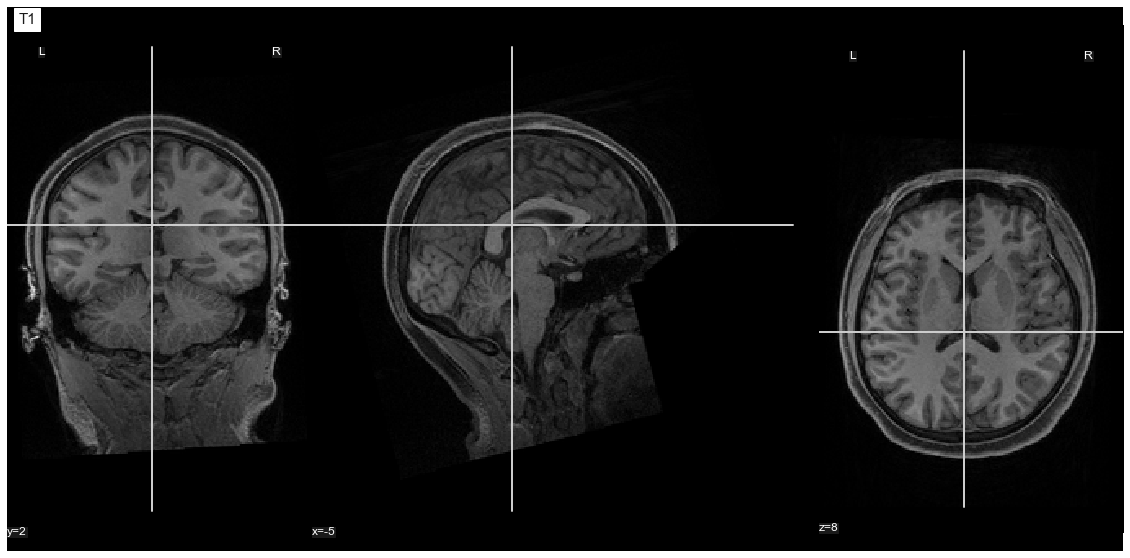

In [17]:
# make interactive?
fig, ax1 = plt.subplots(figsize=(20,10))
plotting.plot_anat(T1_filename, title="T1", vmax=500, axes=ax1)

Can you plot the T2w image?

Solution:

In [ ]:
fig, ax2 = plt.subplots(figsize=(20,10))
plotting.plot_anat(T2_filename, title="T2", vmax=300, axes=ax2)

Do the signal intensities in the T1w and T2w images agree with the plots of their relaxation properties above?

## Diffusion MRI

Diffusion MRI is sensitive to the movement of water in the brain. The movement of water in the brain is highly directional. This means it is more likely to move along the connections between brain areas. 

We can use this information to build an image of what the connections in our brain looks like. 

In [19]:
# load packages - DIPY is a python diffusion MRI processing package.
from dipy.io.image import load_nifti
from dipy.io.gradients import read_bvals_bvecs
from dipy.core.gradients import gradient_table
from dipy.segment.mask import median_otsu
from dipy.reconst import dti

In [20]:
# some diffusion MRI data we has already been downloaded for you
hardi_fname = local_data_dir + 'dmri_examples/HARDI150.nii.gz'
hardi_bval_fname = local_data_dir + 'dmri_examples/HARDI150.bval'
hardi_bvec_fname = local_data_dir + 'dmri_examples/HARDI150.bvec'

In [21]:
# load data
data, affine = load_nifti(hardi_fname)
bvals, bvecs = read_bvals_bvecs(hardi_bval_fname, hardi_bvec_fname)

In [22]:
data.shape

(81, 106, 76, 160)

Diffusion MRI data is 4-dimensional. A 3D image (81, 106, 76) is acquired many times with sensitivities to the diffusion of water in different directions.

Lets visualise some of these directions:

Text(0.5, 1.0, '150th Direction')

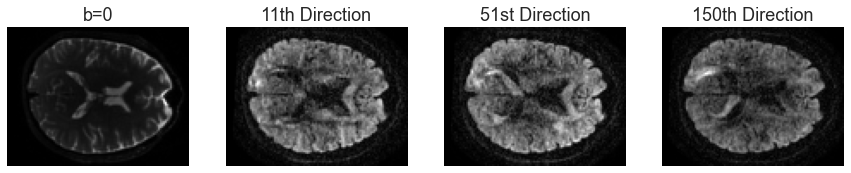

In [25]:
plt.figure(figsize=(15, 20))

# lets pick an axial slice in the middle
ax_slice = data.shape[2] // 2;

# visualise various directions from raw diffusion MRI data
plt.subplot(1, 4, 1).set_axis_off()
plt.imshow(data[:,:,ax_slice,0], cmap='gray')
plt.title("b=0")

plt.subplot(1, 4, 2).set_axis_off()
plt.imshow(data[:,:,ax_slice,10], cmap='gray')
plt.title("11th Direction")

plt.subplot(1, 4, 3).set_axis_off()
plt.imshow(data[:,:,ax_slice,50], cmap='gray')
plt.title("51st Direction")

plt.subplot(1, 4, 4).set_axis_off()
plt.imshow(data[:,:,ax_slice,150], cmap='gray')
plt.title("150th Direction")


EXERCISE HERE TO REPRODUCE ABOVE

We need to process the diffusion MRI data before we can visualise properties associated with underlying biology.

Run the cell below but don't worry about the details. If you'd like more information on what this code does, view the [DIPY examples](https://dipy.org/documentation/1.5.0/examples_built/reconst_dti/#example-reconst-dti) or the [diffusion MRI software carpentry course](https://carpentries-incubator.github.io/SDC-BIDS-dMRI/).

*The cell below may take a while!*

In [41]:
# create gradient table
gtab = gradient_table(bvals, bvecs)

# create brain mask
maskdata, mask = median_otsu(data, vol_idx=range(0, 9), numpass=1, dilate=5)

# fit the diffusion tensor model
dti_model = dti.TensorModel(gtab)
dti_fit = dti_model.fit(maskdata)

Diffusion MRI is sensitive to water diffusing along connections in the brain. We can get a sense of this directionality by colour coding the direction of water diffusion.

This can be seen below where:
- Red: connections running in the left-right direction
- Green: connections running in the anterior-posterior direction
- Blue: connections running in the superior-inferior direction

Text(0.5, 1.0, 'Color coded FA')

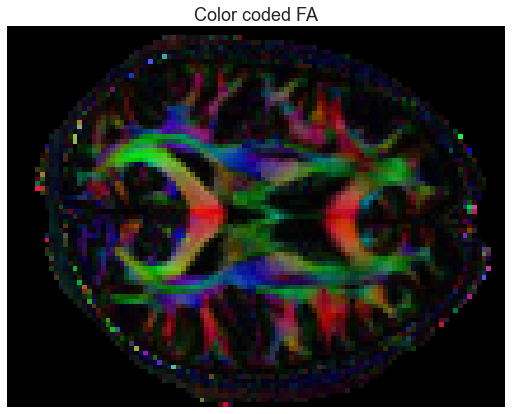

In [44]:
from dipy.reconst.dti import color_fa
import numpy as np

FA = np.clip(dti_fit.fa, 0, 1)  # Just to ensure that FA values are between 0 and 1
colored_FA = color_fa(dti_fit.fa, dti_fit.evecs)

plt.figure(figsize=(9, 7))
plt.subplot(1, 1, 1).set_axis_off()
plt.imshow(colored_FA[:, :, ax_slice])
plt.title("Color coded FA")

We use the function above to colour code FA data from our fitted model (dti_fit.fa).

Can you visualise what the FA looks like? (*Hint: FA is usually visualised in grayscale*)

Solution:

Text(0.5, 1.0, 'FA')

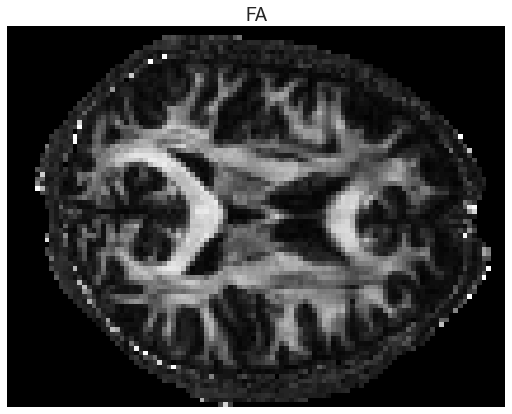

In [54]:
plt.figure(figsize=(9, 7))
plt.subplot(1, 1, 1).set_axis_off()
plt.imshow(dti_fit.fa[:, :, ax_slice], cmap="gray")
plt.title("FA")

## Functional MRI

## Introducing BIDS

In MRI studies, you may have multiple MRI modalities for each participant. Organising your files can quickly become confusing!

The [Brain Imaging Data Structure (BIDS)](https://www.nature.com/articles/sdata201644) is a simple and intuitive way to organize and describe your neuroimaging and behavioural data. Neuroimaging experiments result in complicated data that can be arranged in several different ways. BIDS tackles this problem by suggesting a new standard (based on consensus from multiple researchers across the world) for the arrangement of neuroimaging datasets. Using the same organizational standard for all of your studies will also allow you to easily reuse your scripts and share data and code with other researchers.

In this course, we'll be focusing on organizing MRI data. However, BIDS has since expanded with specifications for [MEG](https://www.nature.com/articles/sdata2018110), [EEG](https://www.nature.com/articles/s41597-019-0104-8), [iEEG](https://www.nature.com/articles/s41597-019-0105-7), [PET](https://journals.sagepub.com/doi/10.1177/0271678X20905433), and [genetics](https://academic.oup.com/gigascience/article/9/10/giaa104/5928221).

For a more comprehensive overview, check out the [BIDS Starter Kit](https://github.com/bids-standard/bids-starter-kit/wiki).

<img src="../fig/bids_structure.jpg" alt="Drawing" align="middle" width="600px"/>